In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Имеются данныме по опозданиям в заключении сделок. В файл записана информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали.

**1. Запишите данные из файла в переменную df. Далее переведите delay в timedelta формат.**

In [2]:
df = pd.read_csv('delays.csv')
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [3]:
df.dtypes

client_id      int64
company_id     int64
delay         object
revenue        int64
dtype: object

In [4]:
df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))
df.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [5]:
df.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

#### 2. Разбейте соответствующую колонку на 3 интервала и поместите значения в колонку delay_categorical.

In [6]:
df['delay_categorical'] = pd.cut(df['delay'], 3)
df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."


#### 3. Разбилось неплохо, но хочется чуть более целые значения и более человеческие названия. Перезадайте колонку delay_categorical, чтобы значения в ней были:
- **'less than 1 day' – время от 0 до 1 дня**
- **'1-2 days' – от 1 до 2 дней**
- **'2-3 days' – от 2 до 3 дней**
- **'more than 3 days' – больше 3 дней**

In [7]:
df['delay_categorical'] = pd.cut(df['delay'],
                                 bins=pd.to_timedelta(['0d', '1d', '2d', '3d', df.delay.max()]),
                                 labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days'])

df.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


#### 4. Теперь постройте барплот с тем, насколько часто задерживаются сделки.

In [8]:
delays_freq = df \
                .groupby('delay_categorical', as_index=False) \
                .agg({'delay': 'count'}) \
                .rename(columns={'delay_categorical': 'period','delay': 'frequency'}) \
                .sort_values('frequency', ascending=False)

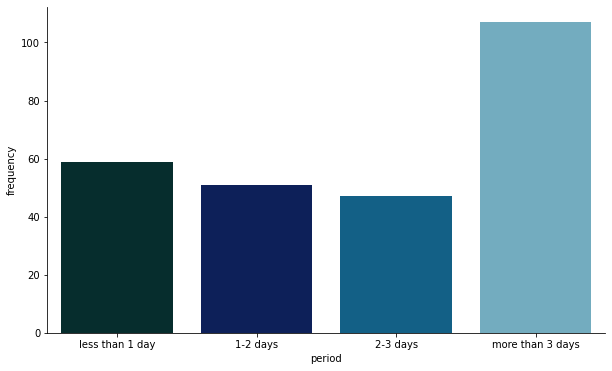

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'period', y = 'frequency', data = delays_freq, palette='ocean')
sns.despine()